In [1]:
import numpy as np #linear algebra
import pandas as pd #data manipulation and analysis

import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization

import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
customer_invoice_df = pd.read_csv("./data/Customer_invoice_data_new.csv", encoding='latin1')

In [3]:
customer_invoice_df

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,3824657.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,3824657.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,4104882.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,4104882.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,4104882.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,4104882.0,France


In [4]:
customer_demographics_df = pd.read_csv("./data/Customer_demographics_data.csv") #, encoding='latin1')
customer_demographics_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,3824657.0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,3717191.0,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,3581921.0,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,3759999.0,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,3306626.0,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,NaN,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,NaN,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,NaN,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,NaN,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [5]:
mapping_df = pd.read_csv("./data/Mapping_table.csv") #, encoding='latin1')
mapping_df

,CustomerID_Demopgrahics,CustomerID Invoice,CustomerID_Behaviour
0,462809,17850.0,3824657.0
1,462643,13047.0,3717191.0
2,466315,12583.0,3581921.0
3,461735,13748.0,3759999.0
4,462669,15100.0,3306626.0
...,...,...,...
8063,464018,NaN,NaN
8064,464685,NaN,NaN
8065,465406,NaN,NaN
8066,467299,NaN,NaN


In [6]:
customer_invoice_df.isnull().sum()

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64

In [7]:
customer_demographics_df.isnull().sum()

ID                 3696
Gender                0
Ever_Married        140
Age                   0
Graduated            78
Profession          124
Work_Experience     829
Spending_Score        0
Family_Size         335
Var_1                76
dtype: int64

In [8]:
mapping_df.isnull().sum()

CustomerID_Demopgrahics       0
CustomerID Invoice         3696
CustomerID_Behaviour       4735
dtype: int64

### Data Cleaning

#### Missing value treatment

In [9]:
customer_demographics_df.dropna(subset=["ID"], inplace=True)
customer_demographics_df["ID"]= customer_demographics_df["ID"].astype(int)

In [10]:
customer_demographics_df['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
customer_demographics_df['Ever_Married'].fillna("Not Available",inplace=True)
customer_demographics_df['Ever_Married'].unique()

array(['No', 'Yes', 'Not Available'], dtype=object)

In [12]:
customer_demographics_df['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
customer_demographics_df['Graduated'].fillna("Not Available",inplace=True)
customer_demographics_df['Graduated'].unique()

array(['No', 'Yes', 'Not Available'], dtype=object)

In [14]:
customer_demographics_df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [15]:
customer_demographics_df['Profession'].fillna("Not Available",inplace=True)
customer_demographics_df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not Available'],
      dtype=object)

In [16]:
customer_demographics_df['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [17]:
customer_demographics_df['Work_Experience'].fillna(0,inplace=True)
customer_demographics_df['Work_Experience'] = customer_demographics_df['Work_Experience'].astype(int)

In [18]:
customer_demographics_df['Family_Size'].unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [19]:
customer_demographics_df['Family_Size'].fillna(0,inplace=True)
customer_demographics_df['Family_Size'] = customer_demographics_df['Family_Size'].astype(int)

In [20]:
customer_demographics_df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [21]:
customer_demographics_df['Var_1'].fillna("Not Available",inplace=True)
customer_demographics_df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2',
       'Not Available', 'Cat_5'], dtype=object)

In [22]:
customer_demographics_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [23]:
customer_demographics_df.describe()

,ID,Age,Work_Experience,Family_Size
count,4.372000e+03,4372.000000,4372.000000,4372.000000
mean,3.743270e+06,43.356130,2.392955,2.724611
std,2.762565e+05,16.798144,3.338211,1.582652
min,3.271058e+06,18.000000,0.000000,0.000000
25%,3.502765e+06,30.000000,0.000000,2.000000
50%,3.741760e+06,40.000000,1.000000,2.000000
75%,3.986153e+06,53.000000,4.000000,4.000000
max,4.229964e+06,89.000000,14.000000,9.000000


In [24]:
customer_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 0 to 4371
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4372 non-null   int32 
 1   Gender           4372 non-null   object
 2   Ever_Married     4372 non-null   object
 3   Age              4372 non-null   int64 
 4   Graduated        4372 non-null   object
 5   Profession       4372 non-null   object
 6   Work_Experience  4372 non-null   int32 
 7   Spending_Score   4372 non-null   object
 8   Family_Size      4372 non-null   int32 
 9   Var_1            4372 non-null   object
dtypes: int32(3), int64(1), object(6)
memory usage: 324.5+ KB


In [25]:
customer_demographics_df['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

#### Checking for Duplicates

In [26]:
customer_demographics_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4
1,3717191,Female,Yes,38,Yes,Engineer,0,Average,3,Cat_4
2,3581921,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6
3,3759999,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6
4,3306626,Female,Yes,40,Yes,Entertainment,0,High,6,Cat_6
...,...,...,...,...,...,...,...,...,...,...
4367,3889944,Male,Not Available,56,Yes,Artist,1,Average,2,Cat_6
4368,4031769,Male,Yes,69,Yes,Executive,0,Low,0,Cat_6
4369,3901612,Male,Yes,40,Yes,Artist,0,Low,3,Cat_6
4370,4217214,Male,Yes,61,Yes,Artist,0,Low,1,Cat_6


In [27]:
customer_demographics_df[customer_demographics_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1


#### No duplicates

### EDA

In [28]:
customer_demographics_df.describe()

,ID,Age,Work_Experience,Family_Size
count,4.372000e+03,4372.000000,4372.000000,4372.000000
mean,3.743270e+06,43.356130,2.392955,2.724611
std,2.762565e+05,16.798144,3.338211,1.582652
min,3.271058e+06,18.000000,0.000000,0.000000
25%,3.502765e+06,30.000000,0.000000,2.000000
50%,3.741760e+06,40.000000,1.000000,2.000000
75%,3.986153e+06,53.000000,4.000000,4.000000
max,4.229964e+06,89.000000,14.000000,9.000000


#### Univariate Analysis

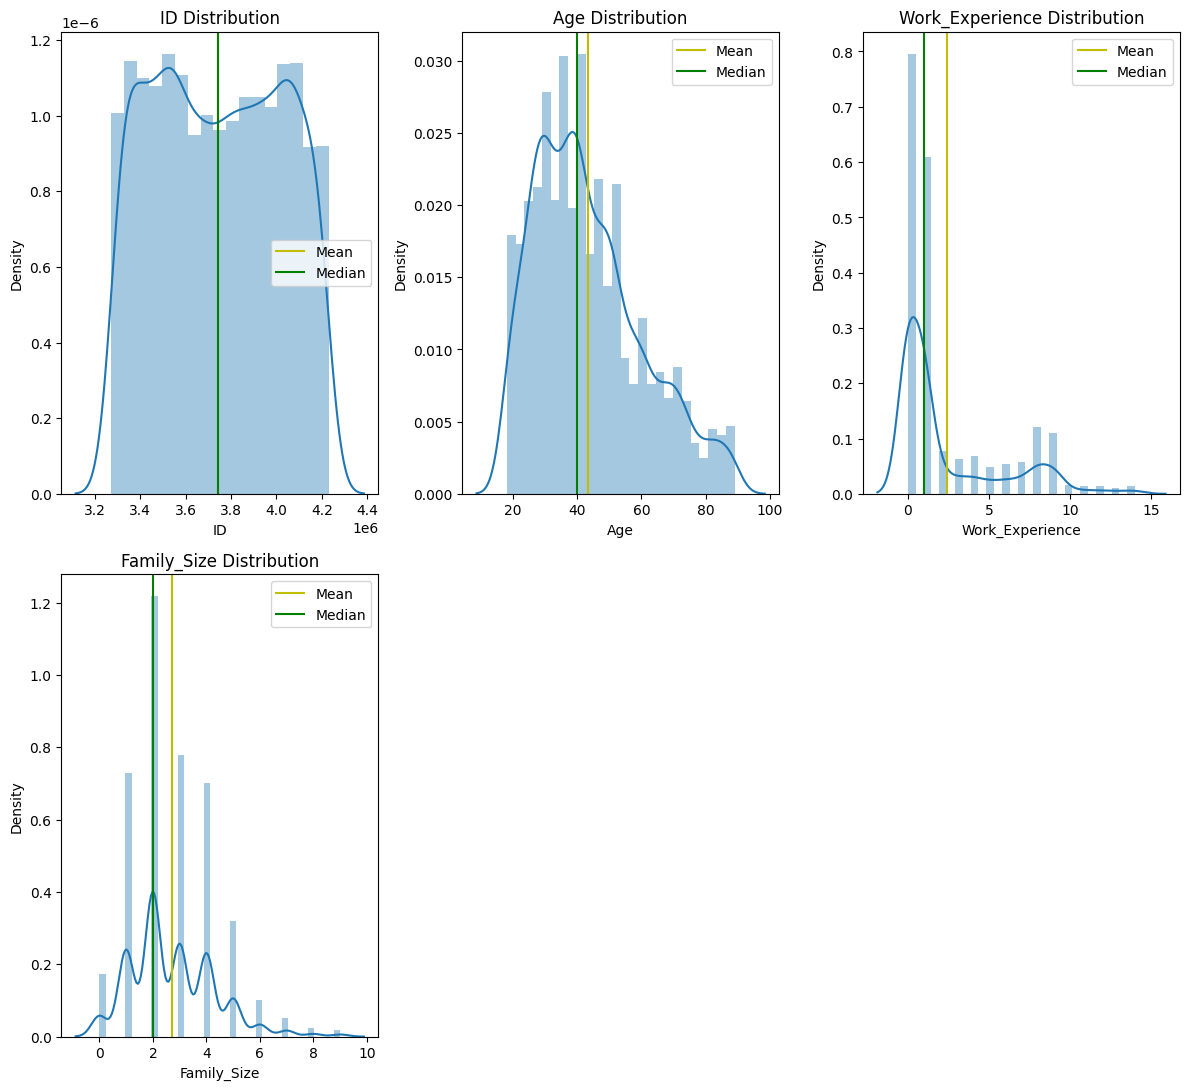

In [29]:
# Visualize the distribution of each variable using histogram.

plt.figure(figsize=(12,16))

for i, j in enumerate(customer_demographics_df.describe().columns[:9]):
    plt.subplot(3,3, i+1)
    sns.distplot(x=customer_demographics_df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.axvline(customer_demographics_df[j].mean(), label='Mean', color='y')
    plt.axvline(customer_demographics_df[j].median(), label='Median', color='g')
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.legend()
    plt.tight_layout()
# plt.savefig('hist.png')
plt.show()

In [30]:
customer_demographics_df2 = customer_demographics_df.copy(deep=True)

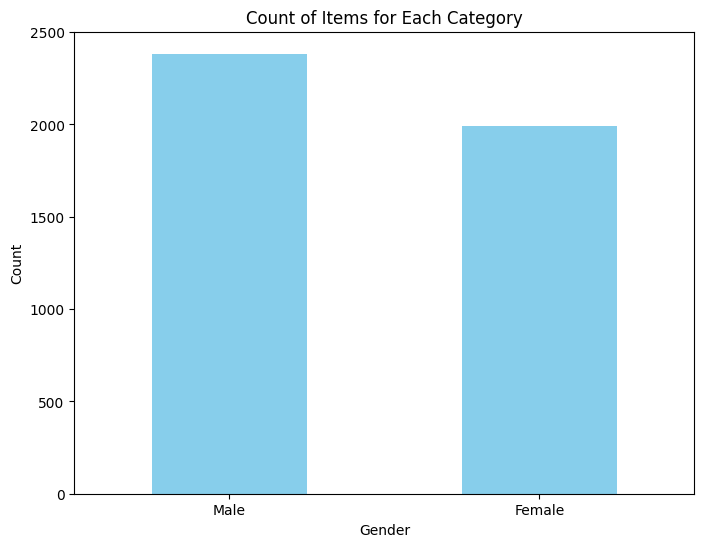

In [31]:
import pandas as pd
# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
customer_demographics_df2['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Items for Each Category')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

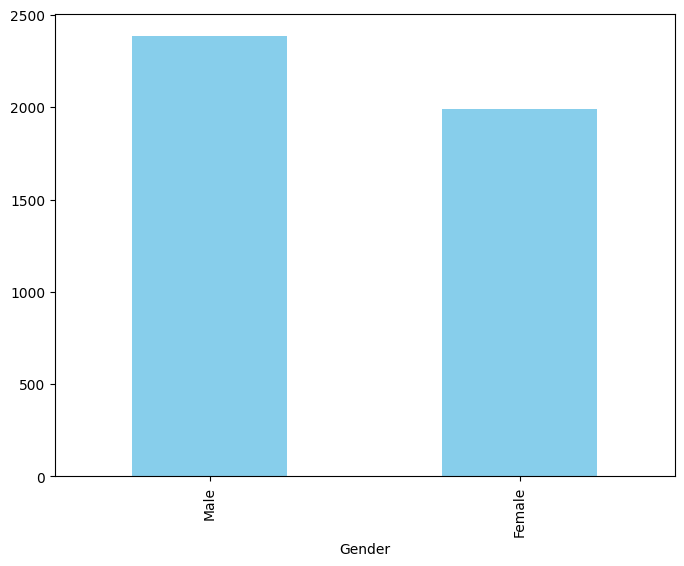

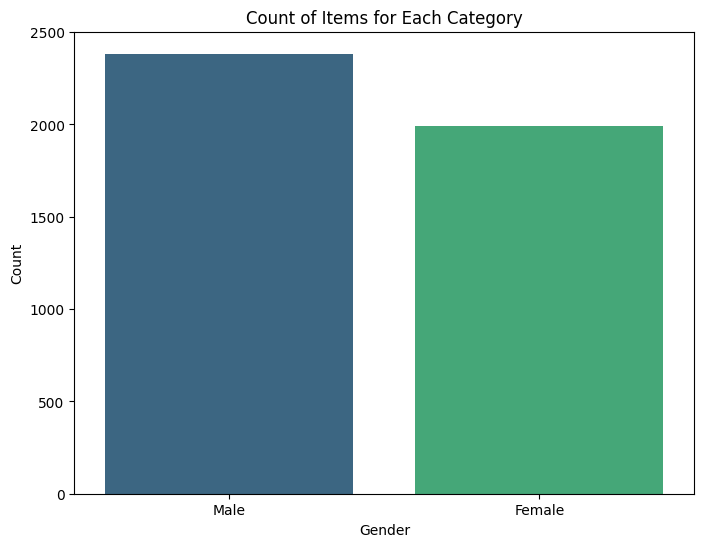

In [32]:
# sns
plt.figure(figsize=(8, 6))
customer_demographics_df2['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=customer_demographics_df2, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Items for Each Category')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

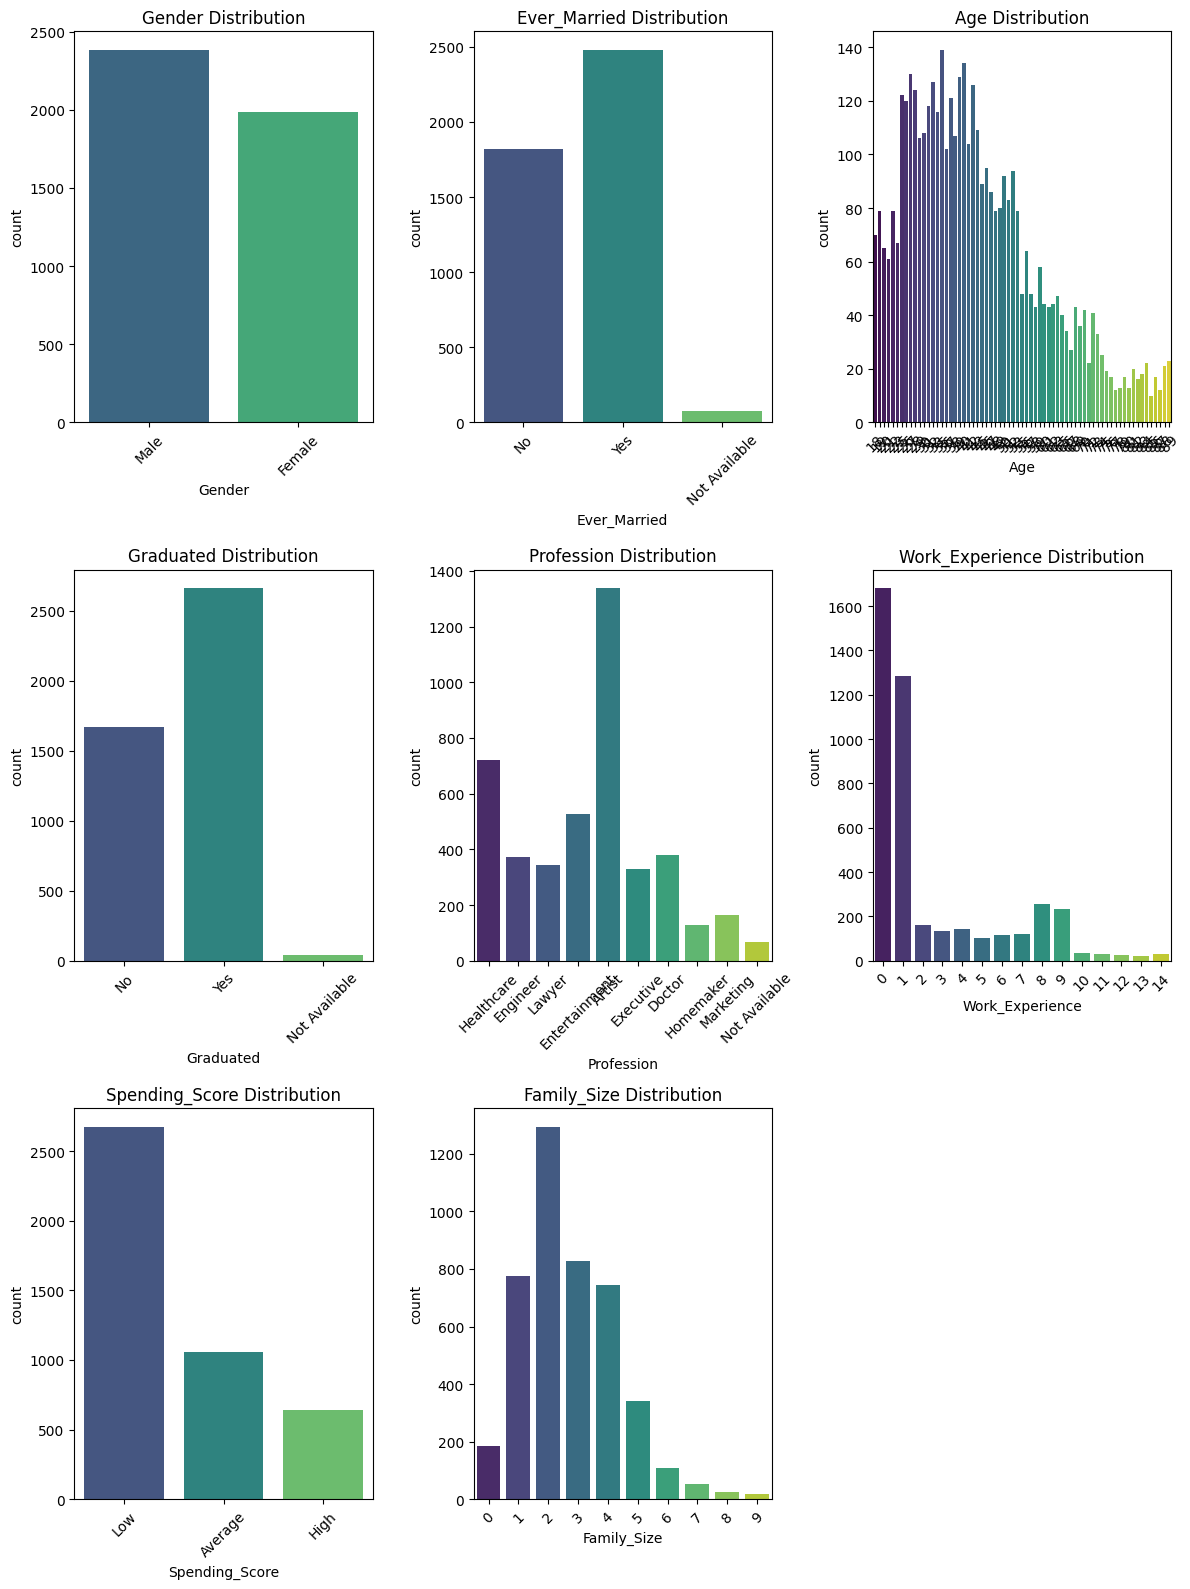

In [33]:
plt.figure(figsize=(12,16))
# customer_demographics_df2['Gender'].value_counts().plot(kind='bar', color='skyblue')
# plt.figure(figsize=(8, 6))
for i, j in enumerate(customer_demographics_df.describe(include='all').columns[1:9]):

    plt.subplot(3,3, i+1)
    # sns.distplot(x=customer_demographics_df2[j])
    sns.countplot(x=j, data=customer_demographics_df2, palette='viridis')
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.axvline(customer_demographics_df[j].mean(), label='Mean', color='y')
    # plt.axvline(customer_demographics_df[j].median(), label='Median', color='g')
    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.xticks(rotation=45)
    # plt.legend()
    plt.tight_layout()
    
# sns.countplot(x='Gender', data=customer_demographics_df2, palette='viridis')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.title('Count of Items for Each Category')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# plt.show()

In [34]:
customer_invoice_df[customer_invoice_df.duplicated()]

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/01/2010 11:45,1.25,4168428.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/01/2010 11:45,2.10,4168428.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/01/2010 11:45,2.95,4168428.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/01/2010 11:45,4.95,4168428.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/01/2010 11:49,2.95,3703359.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/09/2011 11:34,0.39,3637802.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/09/2011 11:34,2.49,3637802.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/09/2011 11:34,1.95,3637802.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/09/2011 11:34,2.10,3637802.0,United Kingdom


In [35]:
# Check for the specific rows
result = customer_invoice_df[
    (customer_invoice_df["InvoiceNo"] == '536409') &
    (customer_invoice_df['Description'] == "UNION JACK FLAG LUGGAGE TAG") &
    (customer_invoice_df["CustomerID"] == 17908.0)
]
 
 
# Display the result
print(result)

KeyError: 'InvoiceNo'

In [ ]:
# Check for duplicate rows
# duplicates = invoice_df[invoice_df.duplicated(keep=False)]
# invoice_df
# # Display duplicate rows
# print("Duplicate Rows:")
# print(duplicates)

customer_invoice_df[~customer_invoice_df.duplicated(keep=False)]

In [ ]:
customer_invoice_df2 = customer_invoice_df.copy(deep=True)

In [ ]:
# customer_invoice_df2

# with null values
customer_invoice_df2 = customer_invoice_df2.dropna()
customer_invoice_df2

In [ ]:
customer_invoice_df2.isnull().sum()

In [ ]:
customer_invoice_df2 = customer_invoice_df2[~customer_invoice_df2.duplicated(keep=False)]